# Import packages 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [29]:
train_data_dir = '../xrays/train'
test_data_dir = '../xrays/test'

train_generator = ImageDataGenerator().flow_from_directory(train_data_dir,
                                                          target_size=(512,512), batch_size=64)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir,
                                                          target_size=(512,512), batch_size=64)

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

Found 5216 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


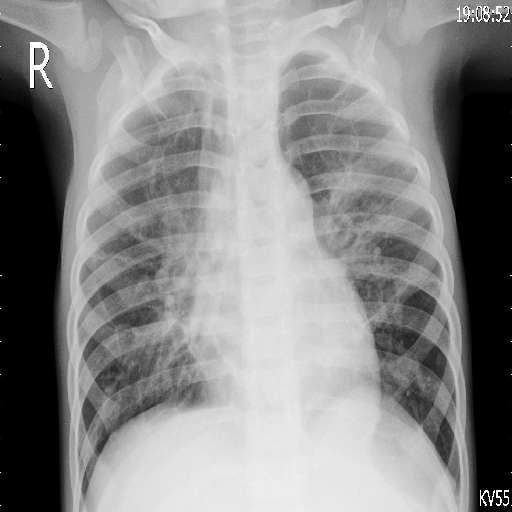

In [30]:
array_to_img(X_test[3])

In [31]:
X_train.shape

(64, 512, 512, 3)

In [32]:
X_train_unrow = X_train.reshape(64, -1)
np.shape(X_train_unrow)

(64, 786432)

In [33]:
X_test_unrow = X_test.reshape(64, -1)
feat_shape = X_test_unrow.shape[1]
feat_shape

786432

In [34]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA_BAC': 1, 'PNEUMONIA_VIRAL': 2}

In [35]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [36]:
# Standardize Image Data
X_train = X_train_unrow/255
X_test = X_test_unrow/255

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(50, activation = 'relu', input_shape = (feat_shape,)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39321650  
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 39,324,353
Trainable params: 39,324,353
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=6, epochs=4, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
score

Epoch 1/4
11/11 [==============================] - 6s 434ms/step - loss: 194.0959 - acc: 0.2802 - val_loss: 43.2713 - val_acc: 0.2500
Epoch 2/4
11/11 [==============================] - 5s 417ms/step - loss: 68.0964 - acc: 0.3917 - val_loss: 1.0998 - val_acc: 0.3906
Epoch 3/4
11/11 [==============================] - 5s 417ms/step - loss: 1.1069 - acc: 0.3978 - val_loss: 1.0986 - val_acc: 0.3750
Epoch 4/4
11/11 [==============================] - 5s 439ms/step - loss: 1.0914 - acc: 0.4815 - val_loss: 1.0980 - val_acc: 0.3750


[1.097989559173584, 0.375]